In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

def load_data(filename = "un_member_states_income.csv"):
    """Load the CSV file with semicolon delimiter"""
    return pd.read_csv(filename, delimiter=",")

allData = load_data("answer_Data.csv")

allData.head()

,country,text,answer,word_count,unique_word_count,token_count,avg_word_length,sentence_count,avg_sentence_length,emoji_count,ib_count,sentiment_polarity,htx,stx,hf,hhx,10,fgu,eux,eud,?,!,vet,erhverv,university,if you,uu-vejleder,background,hobb,goal,interest
0,Afghanistan,Uddannelsesmuligheder i Danmark\nI'm a 16 year...,\nThank you for sharing your background — that...,420,198,602,5.0,26.0,16.2,5,1,0.182529,2,2,1,2,0,0,2,1,6,0,0,2,3,8,0,2,0,0,1
1,Albania,Uddannelsesmuligheder efter folkeskole\nI'm a ...,\nThank you for sharing a bit about yourself —...,396,211,562,5.1,27.0,14.7,2,2,0.226125,1,2,1,2,0,0,3,2,4,0,0,1,5,13,0,0,0,1,4
2,Algeria,Uddannelsesmuligheder efter folkeskole\nI'm a ...,\nThank you for sharing a bit about yourself —...,418,232,599,5.0,26.0,16.1,1,1,0.199577,1,3,1,3,1,0,2,0,1,0,3,1,3,13,0,1,0,0,4
3,Andorra,Uddannelsesvalg efter folkeskolen\nI'm a 16 ye...,\nThank you for sharing a bit about yourself —...,434,224,626,5.2,34.0,12.9,5,2,0.177300,2,3,1,3,0,0,0,0,7,0,1,1,2,10,0,1,0,0,5
4,Angola,Uddannelsesvalg efter folkeskole\nI'm a 16 yea...,\nThanks for sharing — you're in a very import...,370,202,547,5.0,23.0,16.1,1,0,0.242352,1,2,1,2,2,0,2,0,5,0,3,1,2,8,0,1,0,0,3


In [8]:
features = allData.drop(columns=['country', 'text', 'answer']) #drop the country and text columns

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features) #standardize the features

pca = PCA()
pca_result = pca.fit_transform(features_scaled) #apply PCA to the standardized features

explained_variance = pca.explained_variance_ratio_ #calculate the explained variance

pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

In [9]:
from scipy.stats import skew
#calculate the skewness of the standardized features
skewness_values = pd.DataFrame(skew(features_scaled, axis=0), index=features.columns, columns=['Skewness'])

#display the skewness values
print(skewness_values)

                     Skewness
word_count           0.167967
unique_word_count    0.273356
token_count          0.151741
avg_word_length      0.172105
sentence_count       0.262390
avg_sentence_length  0.783517
emoji_count          0.323079
ib_count             1.756191
sentiment_polarity  -0.145664
htx                  0.604746
stx                  0.910701
hf                   0.740471
hhx                  0.800387
10                   1.371452
fgu                  6.728385
eux                  0.101766
eud                  0.767777
?                    0.173437
!                    1.814171
vet                  2.278939
erhverv              0.611519
university           0.510258
if you               0.084919
uu-vejleder          2.429276
background           0.567288
hobb                 1.797222
goal                 1.010472
interest             0.359337


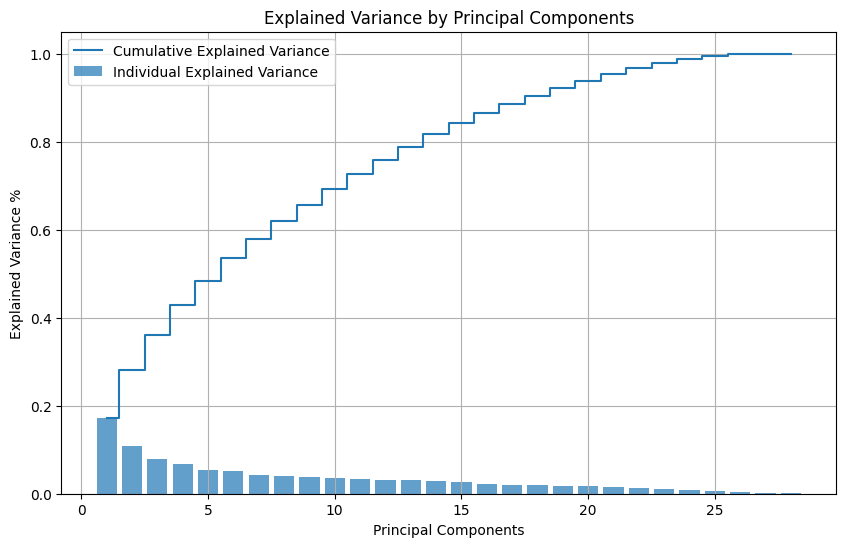

In [10]:
plt.figure(figsize=(10,6))

#plot the explained variance for each principal component
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center',
        label='Individual Explained Variance')

#plot the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid',
         label='Cumulative Explained Variance')

plt.xlabel('Principal Components')
plt.ylabel('Explained Variance %')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [11]:
cumulative_variance

array([0.17279531, 0.2813439 , 0.36130388, 0.42984693, 0.4839253 ,
       0.53592112, 0.57955357, 0.61931999, 0.65689951, 0.69177359,
       0.726073  , 0.75803061, 0.7881248 , 0.81740787, 0.84291985,
       0.86534264, 0.88593541, 0.90465674, 0.92232326, 0.9389304 ,
       0.95461687, 0.96758551, 0.97863288, 0.98754055, 0.99418401,
       0.99831839, 0.99921936, 1.        ])

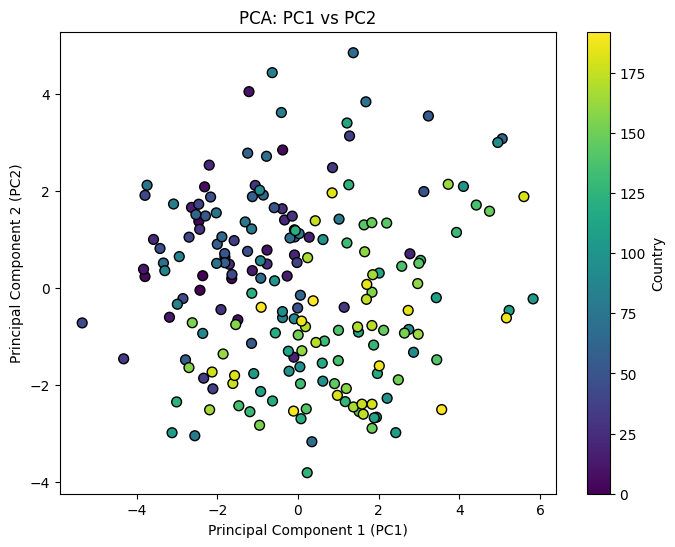

In [16]:
import matplotlib.pyplot as plt

#choose to plot the first two principal components, as they explain around 90% of the variance
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=allData['country'], cmap='viridis', edgecolor='k', s=50)
plt.title('PCA: PC1 vs PC2')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.colorbar(label='Country')
plt.show()


In [ ]:
#would like to see the loadings (the coefficients of the linear combination) for PC1 and PC2
loadings = pca.components_.T

loadings_df = pd.DataFrame(loadings[:, :2], columns=['PC1', 'PC2'], index=features.columns)

print(loadings_df)


                      PC1       PC2
Area             0.444445 -0.026895
Perimeter        0.441567 -0.082988
Compactness      0.277915  0.525360
Kernel.Length    0.424126 -0.200075
Kernel.Width     0.432937  0.115725
Asymmetry.Coeff -0.115743 -0.721226
Kernel.Groove    0.386699 -0.377887


In [7]:
data['Type']

0      1
1      1
2      1
3      1
4      1
      ..
194    3
195    3
196    3
197    3
198    3
Name: Type, Length: 199, dtype: int64

In [8]:
data

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9a3d5ed6-7794-41f5-9c42-ade9fc902fd4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>